In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os,sys
from pathlib import Path

In [41]:
df=pd.read_csv(Path(os.path.join("D:/weather/notebook/Data","weather_classification_data.csv")))

In [42]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [44]:
X=df.drop(columns=["Weather Type"],axis=1)

In [45]:
X.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location'],
      dtype='object')

In [46]:
y=df['Weather Type']

In [47]:
yann=df["Weather Type"]

In [48]:
numerical_columns_name=X.select_dtypes(exclude="object").columns
categorical_columns_name=X.select_dtypes(include="object").columns

In [49]:
numerical_columns_name

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')

In [50]:
categorical_columns_name

Index(['Cloud Cover', 'Season', 'Location'], dtype='object')

In [51]:
#encode the label data uses in machine learning algorithm
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)

In [52]:
yann=pd.DataFrame(yann,columns=["Weather Type"])

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
#encode the data for using neural network
ohe=OneHotEncoder(sparse_output=False)
yann=ohe.fit_transform(yann)

In [55]:
yann.shape

(13200, 4)

In [97]:
np.array(yann)

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [56]:
np.unique(y)

array([0, 1, 2, 3])

In [57]:
categorical_columns_name

Index(['Cloud Cover', 'Season', 'Location'], dtype='object')

In [58]:
X[categorical_columns_name]["Location"].unique()

array(['inland', 'mountain', 'coastal'], dtype=object)

In [59]:
# now split the data then make the pipeline for transofrm the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,yann,test_size=0.30) 

In [60]:
yann

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [61]:
X_train.shape

(9240, 10)

In [62]:
y_train.shape

(9240, 4)

In [63]:
X_test.shape

(3960, 10)

In [64]:
y_test.shape

(3960, 4)

In [65]:
#now make the pipeline for scale the data and transform the data
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [66]:
numerical_pipeline=Pipeline(
    steps=[
        ("impute",SimpleImputer(strategy="mean")),
        ("scaler",StandardScaler())
    ]
)
categorical_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("encoder",OneHotEncoder(sparse_output=False))
    ]
)

In [67]:
transformer=ColumnTransformer(
    [
        ("numberical_pipeline",numerical_pipeline,numerical_columns_name),
        ("categorical_pipeline",categorical_pipeline,categorical_columns_name)
    ]
)

In [68]:
#now fit the data
transformer.fit_transform(X_train)

array([[ 0.96555087, -2.2603641 , -0.63363433, ...,  1.        ,
         0.        ,  0.        ],
       [-1.38452489,  0.45058132,  0.44871369, ...,  0.        ,
         1.        ,  0.        ],
       [-0.35278431,  0.4012914 , -0.70579086, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.42410224, -1.47172543, -0.92226046, ...,  0.        ,
         0.        ,  1.        ],
       [-1.55648165,  1.14064015,  1.31459209, ...,  0.        ,
         0.        ,  1.        ],
       [-1.67111949,  0.4012914 ,  1.17027903, ...,  0.        ,
         0.        ,  1.        ]])

In [69]:
transformer.transform(X_test)

array([[ 0.62163734, -0.97882627, -1.2108866 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.33504274,  1.09135024,  0.30440062, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.56431842, -1.81675485, -0.994417  , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.00887079, -0.63379685, -0.20069512, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.04844814,  1.04206032,  1.02596596, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.04844814,  0.00697207, -0.41716472, ...,  0.        ,
         0.        ,  1.        ]])

In [70]:
#now we have to make the dataframe for use these encoded values
X_train=pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
X_test=pd.DataFrame(transformer.transform(X_test),columns=transformer.get_feature_names_out())


In [71]:
X_train.shape

(9240, 18)

In [72]:
X_test.shape

(3960, 18)

#now ready to train the data in a model 
#so first train by ANN (artifical neural network)
#then train by different different machine learning models(decision Tree,boosting and XGboost and RandomForest algorithms)

In [73]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [74]:
model=Sequential()
model.add(Dense(64,activation="relu",input_shape=(18,)))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="tanh"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="softmax"))
model.summary()

d:\anaconda3\envs\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,052 (19.73 KB)

 Trainable params: 5,052 (19.73 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [76]:
history=model.fit(X_train,y_train,epochs=25,validation_data=[X_test,y_test])

Epoch 1/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6701 - loss: 0.8811 - val_accuracy: 0.8987 - val_loss: 0.3050
Epoch 2/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9059 - loss: 0.2649 - val_accuracy: 0.9078 - val_loss: 0.2346
Epoch 3/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9038 - loss: 0.2203 - val_accuracy: 0.9086 - val_loss: 0.2152
Epoch 4/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9130 - loss: 0.1934 - val_accuracy: 0.9073 - val_loss: 0.2058
Epoch 5/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9158 - loss: 0.1885 - val_accuracy: 0.9053 - val_loss: 0.2062
Epoch 6/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9144 - loss: 0.1816 - val_accuracy: 0.9081 - val_loss: 0.2007
Epoch 7/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9215 - loss: 0.1693 - val_accuracy: 0.9106 - val_loss: 0.2025
Epoch 8/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9154 - loss: 0.1747 - val_accuracy: 0.

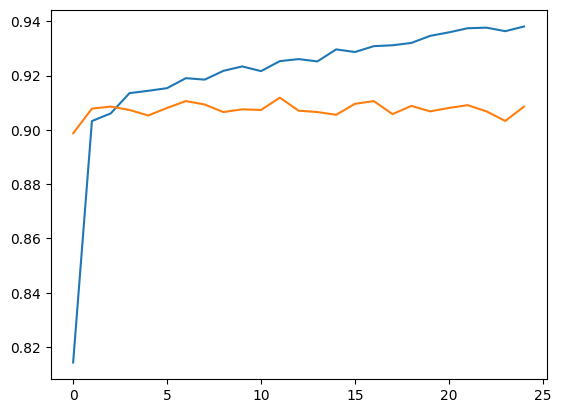

In [79]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

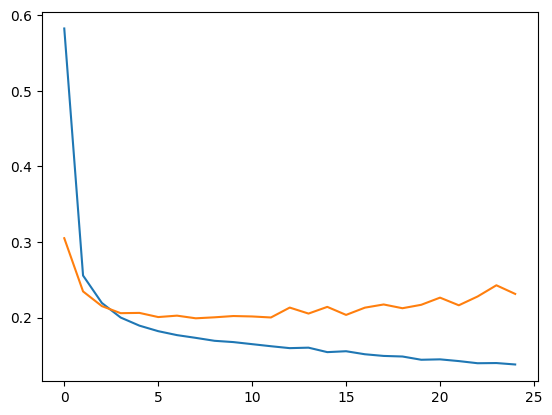

In [80]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [84]:
print(history.history["accuracy"])

[0.8142856955528259, 0.9032467603683472, 0.9060605764389038, 0.9135281443595886, 0.914393961429596, 0.9153679609298706, 0.9190475940704346, 0.9185065031051636, 0.9217532277107239, 0.9233766198158264, 0.9216450452804565, 0.9253246784210205, 0.9260822534561157, 0.9252164363861084, 0.9296537041664124, 0.9286796450614929, 0.9308441281318665, 0.9311688542366028, 0.9320346117019653, 0.9346320629119873, 0.9359307289123535, 0.937445878982544, 0.9376623630523682, 0.9363636374473572, 0.938095211982727]


In [89]:
pip install keras-tuner --upgrade

Note: you may need to restart the kernel to use updated packages.


In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from kerastuner import RandomSearch

# Define a model-building function
def build_model(hp):
    model = Sequential()
    
    # Choose the number of layers and neurons in each layer
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i), 
                                     min_value=32, 
                                     max_value=128, 
                                     step=32),
                        activation=hp.Choice('activation_' + str(i), 
                                             values=['relu', 'tanh'])))
    
    # Output layer
    model.add(Dense(4, activation='softmax'))
    
    # Compile the model with a choice of optimizers
    model.compile(optimizer=hp.Choice('optimizer', 
                                      values=['adam', 'rmsprop']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create a RandomSearch tuner
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=10,  # Number of different models to try
                     executions_per_trial=3,  # Number of times to train each model
                     directory='my_dir',
                     project_name='ann_tuning')

# Search for the best hyperparameters
tuner.search(X_train, y_train,
             epochs=10,
             validation_data=(X_test, y_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Print the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hyperparameters.values)


Reloading Tuner from my_dir\ann_tuning\tuner0.json
{'num_layers': 2, 'units_0': 96, 'activation_0': 'relu', 'optimizer': 'adam', 'units_1': 64, 'activation_1': 'relu', 'units_2': 64, 'activation_2': 'tanh'}


d:\anaconda3\envs\env\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [92]:
best_hyperparameters.values

{'num_layers': 2,
 'units_0': 96,
 'activation_0': 'relu',
 'optimizer': 'adam',
 'units_1': 64,
 'activation_1': 'relu',
 'units_2': 64,
 'activation_2': 'tanh'}